In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial
from scipy import signal

### **Periodicidade** 

---
Relembrando:

$x[n] = Acos(\omega n T +\phi) = Acos(2 \pi f n T +\phi)$

- $A:$ Amplitude.
- $\omega:$ frequência angular ($\frac{radians}{seconds}$).
- $f = (\frac{\omega}{2\pi}):$ frequência em Hertz $(\frac{cycles}{seconds})$.
- $\phi:$ Fase inicial em radianos.
- $n:$ index de tempo.
- $T = (\frac{1}{f_s}):$ período de amostragem em segundos. $(t=nT=\frac{n}{f_s})$

---

Um sinal é periódico se e somente se  $\exists N \in \mathbb{Z}^+, x[n] = x[n + N]$:

Prova

> Definição:
  $$Acos(\omega nT + \phi) = Acos(\omega (n+N)T + \phi)$$
  Distributiva:
  $$Acos(\omega nT + \phi) = Acos(\omega nT +\omega NT + \phi)$$
  Deslocar por $2\pi$ :
  $$Acos(\omega nT + 2\pi k +\phi ) = Acos(\omega nT + \omega NT  + \phi)$$
  Então temos que ter:
  $$2\pi k = \omega NT$$
  Logo:
  $$N = \frac{2\pi k}{\omega T} = \frac{2\pi k}{2\pi f T} = \frac{2\pi k}{2\pi\frac{f}{f_s}} = \frac{f_s k}{f}$$
  Onde $k \in \mathbb{Z}$. Vamos demonstrar.
  
---

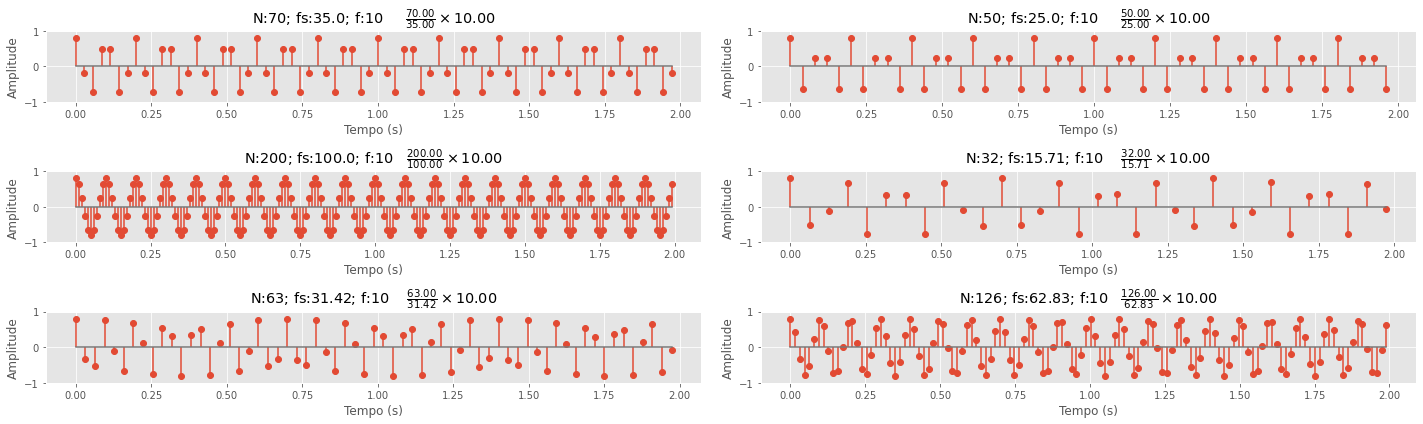

In [2]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

A   = 0.8
f0  = 10
fss = np.array([35, 25, 100, 5*np.pi, 10*np.pi, 20*np.pi])
phi = 0

for ax, fs in zip(axs.flatten(), fss):
    
    T   = 1/fs 
    t   = np.arange(0, 2, T)
    N   = len(t)
    
    x   = A*np.cos(2*np.pi*f0*t+phi)
    
    ax.stem(t,x)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"N:{round(N,2)}; fs:{round(fs,2)}; f:{round(f0,2)}\t" + r"$\frac{%.2f}{%.2f}\times%.2f$" % (N,fs,f0))
    ax.set_ylim(-A-0.2,A+0.2)
    
plt.tight_layout()

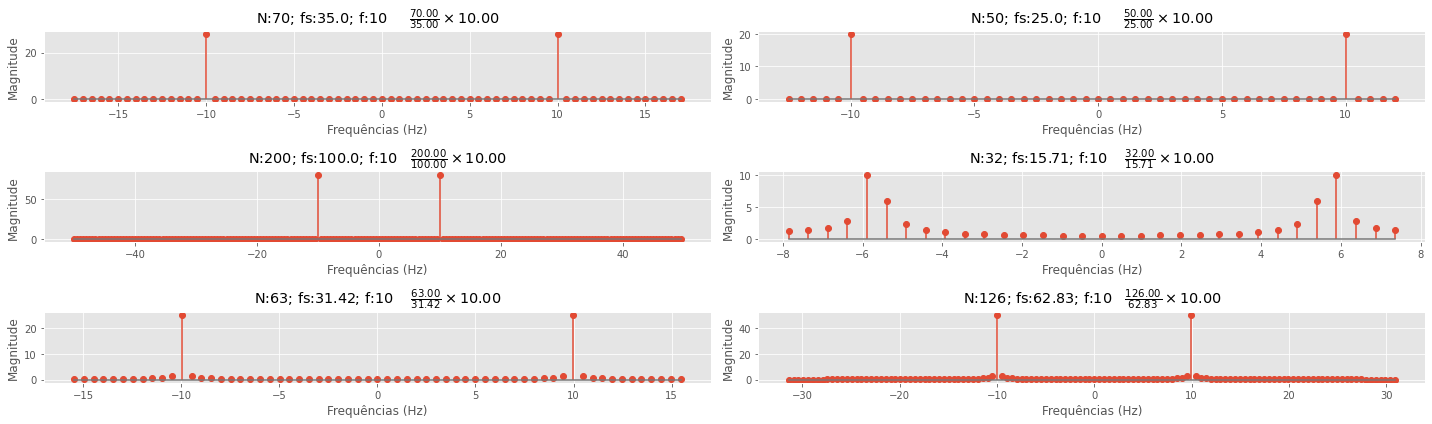

In [5]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

for ax, fs in zip(axs.flatten(), fss):
    
    Ts   = 1/fs 
    t   = np.arange(0, 2, Ts)
    N   = len(t)
    
    x   = A*np.cos(2*np.pi*f0*t+phi)
    
    X = np.fft.fft(x)
    freqs = np.fft.fftfreq(N, Ts)
    
    
    ax.stem(freqs, np.abs(X))
    ax.set_xlabel("Frequências (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title(f"N:{round(N,2)}; fs:{round(fs,2)}; f:{round(f0,2)}\t" + r"$\frac{%.2f}{%.2f}\times%.2f$" % (N,fs,f0))
    
plt.tight_layout()